# Group Project - Artificial Intelligence and Machine Learning
### Group Members:
- Davide Beltrame
- Demetrio Francesco Cardile
- Mariasole Mohn

### Brief introduction on the task
The greatest financial company in the world has collected bank details and credit-related information from all over the globe. Your task is to design a data-driven solution to reduce the manual burden and divide the user into three credit score brackets: Poor, Standard and Good.

## 1) Exploratory Data Analysis
In this script, we will guide you through a deep analysis of the dataset, thus highlighting some interesting features regarding its variables, trying to extrapolate as much information as possible from data.

### 1.0 Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Importing the dataset
Since given as a ".csv" file, we will use the built-in pandas function to read the dataset.

In [2]:
data_df = pd.read_csv("credit_prediction.csv")

### 1.2 Showing the dimension of the dataset

In [3]:
data_df.shape

(100000, 23)

Notice that the dataset has 100000 observations (rows), and 23 variables (columns).

### 1.3 General overview of the dataset
Using the function ".head()" we extract the first 5 columns (by default) of the dataset. They're not useful for analytic purposes, but still enable us to visualize the dataset.

In [4]:
data_df.head();

### 1.4 Getting information from data

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  int64  
 1   Age                       90113 non-null   float64
 2   Occupation                89954 non-null   object 
 3   Annual_Income             89811 non-null   float64
 4   Monthly_Inhand_Salary     89881 non-null   float64
 5   Num_Bank_Accounts         89935 non-null   float64
 6   Num_Credit_Card           90131 non-null   float64
 7   Interest_Rate             89999 non-null   float64
 8   Num_of_Loan               90030 non-null   float64
 9   Type_of_Loan              89921 non-null   object 
 10  Delay_from_due_date       90053 non-null   float64
 11  Num_of_Delayed_Payment    89927 non-null   float64
 12  Changed_Credit_Limit      90077 non-null   float64
 13  Num_Credit_Inquiries      89971 non-null   fl

This visualization helps us a lot. In fact, we know that there are only two columns having complete information (hence, 0 null-values): id and Credit_score. Instead, all the other columns include null-values, and we will see later how to handle them. Moreover, we see that among 23 variables only 6 are categorical, while 17 are numerical. Again, we will see later how to handle the former ones.

### 1.5 Handling missing values 

Despite it may seem a task concerning data cleaning, we will handle missing values in exploratory data analysis in order to plot data and have a better visualization. In particluar, we will adopt the following strategy to handle missing values: we will replace them with the mode, both in the case of categorical data and numerical data.

We will avoid both rowise and columnswise deletion, thus mantaining as much information as possible to build a more accurate model.

#### General overview of null-values

In [6]:
data_df.isnull().sum()

id                              0
Age                          9887
Occupation                  10046
Annual_Income               10189
Monthly_Inhand_Salary       10119
Num_Bank_Accounts           10065
Num_Credit_Card              9869
Interest_Rate               10001
Num_of_Loan                  9970
Type_of_Loan                10079
Delay_from_due_date          9947
Num_of_Delayed_Payment      10073
Changed_Credit_Limit         9923
Num_Credit_Inquiries        10029
Credit_Mix                  10105
Outstanding_Debt             9846
Credit_Utilization_Ratio    10012
Credit_History_Age           9984
Payment_of_Min_Amount        9958
Amount_invested_monthly     10045
Payment_Behaviour           10076
Monthly_Balance              9899
Credit_Score                    0
dtype: int64

Note that on average, the 10% of each column's values is made of null-values.

In [7]:
for column in data_df.columns:
    data_df[column].fillna(data_df[column].mode()[0], inplace=True)
data_df.isnull().sum()

id                          0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

We avoided long computations by using a single for loop that iterates over the columns of the dataframe and replaces the missing rows of each column with its mode. Now, using the command ".isnull().sum()", we notice that there are no longer columns containing missing values.

### 1.6 Insights on numeric variables

Thanks to the function "describe", one can show the most interesting features for each numerical variable, such as mean, standard deviation, min value and max value.

In [8]:
data_df.describe()

,id,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05
mean,49999.500000,33.795250,56564.452515,4082.741972,5.426810,5.481080,13.871310,3.382150,20.469180,13.87475,10.249110,5.624520,1330.194566,31.066500,220.29518,1587.086647,-3.303000e+25
std,28867.657797,10.314077,40472.167201,3041.033506,2.464736,1.970386,8.519373,2.369626,14.172442,6.18341,6.304513,3.711699,1132.236575,6.074480,94.59550,3433.612104,9.959477e+25
min,0.000000,14.000000,7005.930000,303.645417,-1.000000,0.000000,1.000000,0.000000,-1.000000,-2.00000,0.500000,0.000000,0.230000,20.100770,1.00000,0.000000,-3.333333e+26
25%,24999.750000,25.000000,20347.965000,1724.938333,4.000000,4.000000,8.000000,2.000000,11.000000,9.00000,5.930000,3.000000,460.460000,26.592587,155.00000,76.153684,2.442807e+02
50%,49999.500000,35.000000,42274.960000,3080.555000,6.000000,5.000000,12.000000,3.000000,16.000000,15.00000,8.630000,5.000000,1036.990000,31.377506,213.00000,149.037636,3.173305e+02
75%,74999.250000,41.000000,88227.305000,5582.570625,7.000000,7.000000,19.000000,5.000000,27.000000,19.00000,13.870000,8.000000,1760.010000,36.033109,291.00000,372.057747,4.424400e+02
max,99999.000000,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.000000,9.000000,62.000000,25.00000,29.980000,17.000000,4998.070000,50.000000,404.00000,10000.000000,1.183931e+03


This overview enables us to highlight some insights. Among the latter we find that:

- The dataset includes only relatively young people, since the oldest one is 56 years old and the average age is around 34.
- Users tend to belong to the wealthy class (on average), since the mean monthly salary is approximately 4100 USD.
- Most of the users tend to have a high number of delayed payments (since 3rd quartile is 19), but at the same time the delay (in term of days) is not too high. In fact, the third quartile for the latter is 27 days, and the highest value is 62 days. So, there's no user in the dataset that exceeds payments of more than two months.
- The outstanding debt is not high, since it's on average fixed to approximately 1300 USD, and the third quartile is approximately 1800 USD.

### 1.7 Insights on categorical variables

Through the function".info()" we found out that among the 23 variabes, 6 of them were categorical. The latter are the following:
- Occupation
- Type_of_Loan
- Credit_Mix
- Payment_of_Min_Amount
- Payment_Behaviour
- Credit_Score

#### Insights of "Occupation"

In [9]:
data_df['Occupation'].value_counts()

Lawyer           16414
Engineer          6150
Architect         6147
Accountant        6073
Developer         6058
Teacher           6050
Mechanic          6049
Media_Manager     6047
Scientist         6033
Entrepreneur      5982
Doctor            5941
Journalist        5891
Manager           5777
Musician          5736
Writer            5652
Name: Occupation, dtype: int64

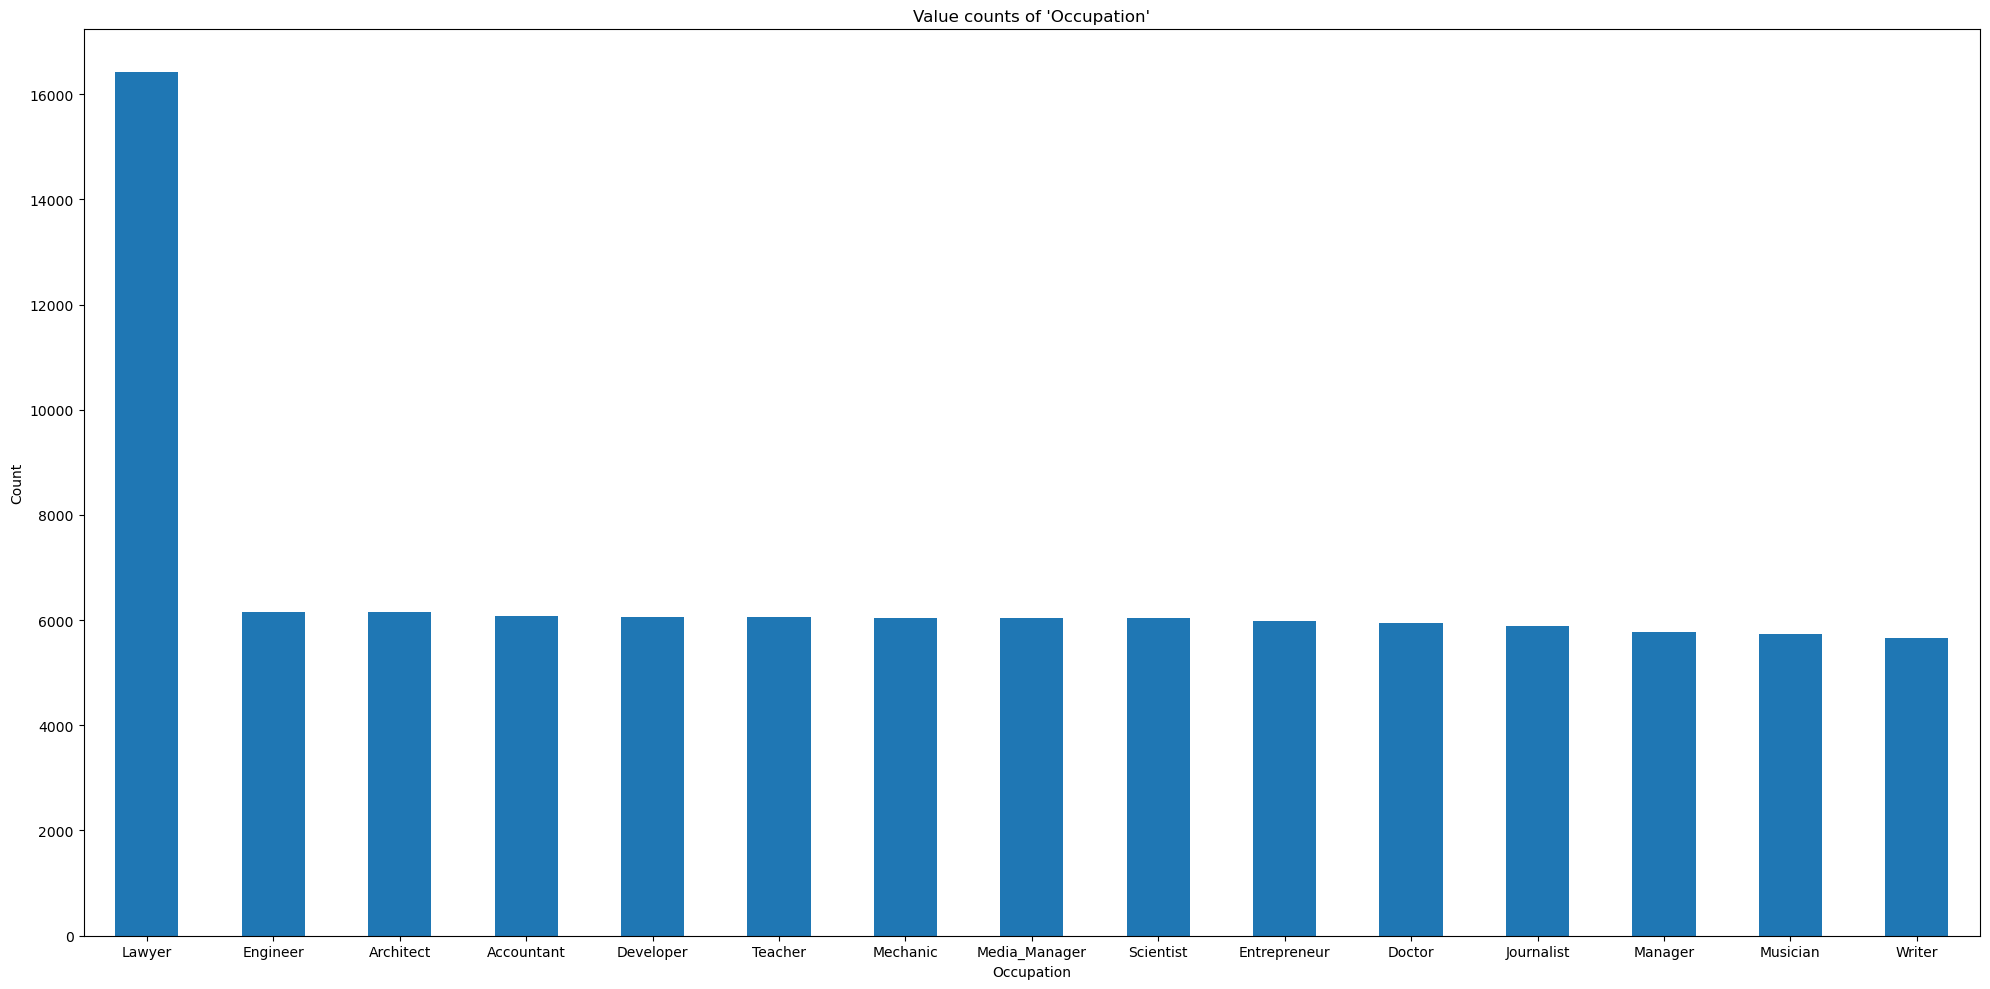

In [10]:
plt.figure(figsize=(20,10))
data_df['Occupation'].value_counts().plot(kind="bar")
plt.title("Value counts of 'Occupation'")
plt.xlabel("Occupation")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

It is clearly evident that the dataset is in a sense unbalanced (at least under the point of view of occupation), since there are much more lawyers than other employees.

#### Insights of "Type_of_Loan"

In [11]:
data_df['Type_of_Loan'].value_counts();

Notice that the variable is a multiattribute one, since a person may have multiple loans of many types.

#### Insights of "Credit_Mix"

In [12]:
data_df['Credit_Mix'].value_counts()

Standard    51328
Good        27173
Bad         21499
Name: Credit_Mix, dtype: int64

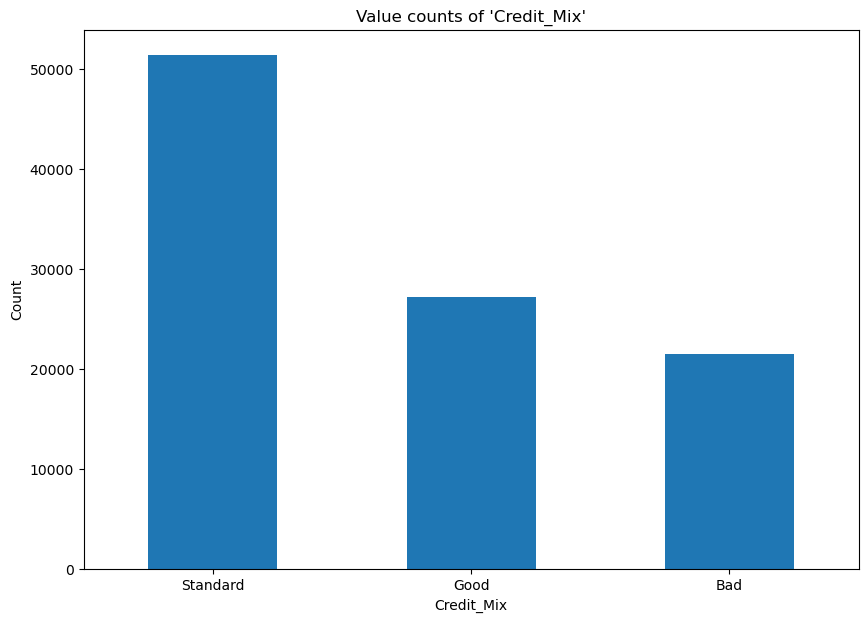

In [13]:
plt.figure(figsize=(10,7))
data_df['Credit_Mix'].value_counts().plot(kind="bar")
plt.title("Value counts of 'Credit_Mix'")
plt.xlabel("Credit_Mix")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

Standard classification of the mix of credits is the most frequent, while bad is the least one.

#### Insights on "Payment_of_Min_Amount"

In [14]:
data_df['Payment_of_Min_Amount'].value_counts()

Yes    57035
No     32079
NM     10886
Name: Payment_of_Min_Amount, dtype: int64

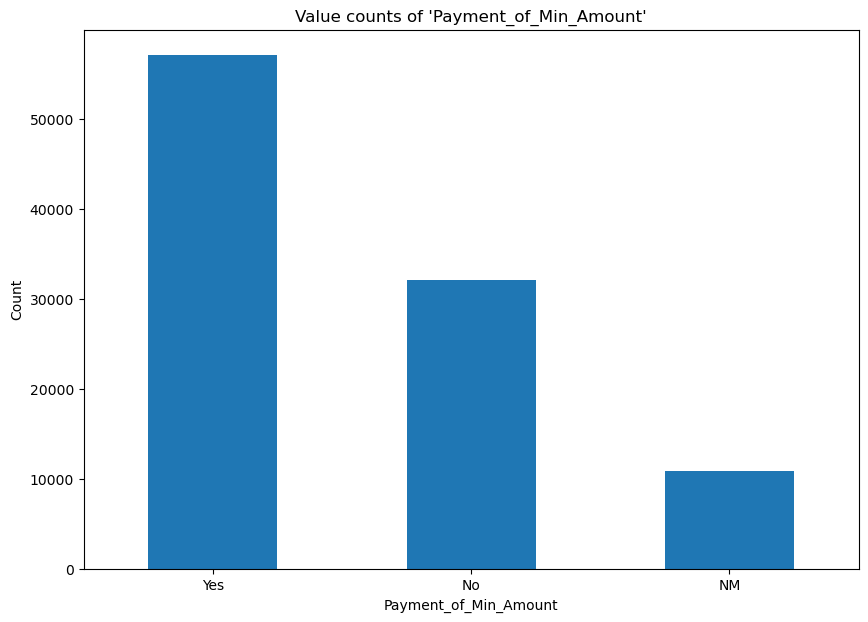

In [15]:
plt.figure(figsize=(10,7))
data_df['Payment_of_Min_Amount'].value_counts().plot(kind="bar")
plt.title("Value counts of 'Payment_of_Min_Amount'")
plt.xlabel("Payment_of_Min_Amount")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

This variable represents whether only the minimum amount was paid by
the person. It seems that most of the times the answer is "Yes".

#### Insights on "Payment_Behaviour"

In [16]:
data_df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      35426
High_spent_Medium_value_payments    17694
Low_spent_Medium_value_payments     13265
High_spent_Large_value_payments     13184
High_spent_Small_value_payments     10694
Low_spent_Large_value_payments       9737
Name: Payment_Behaviour, dtype: int64

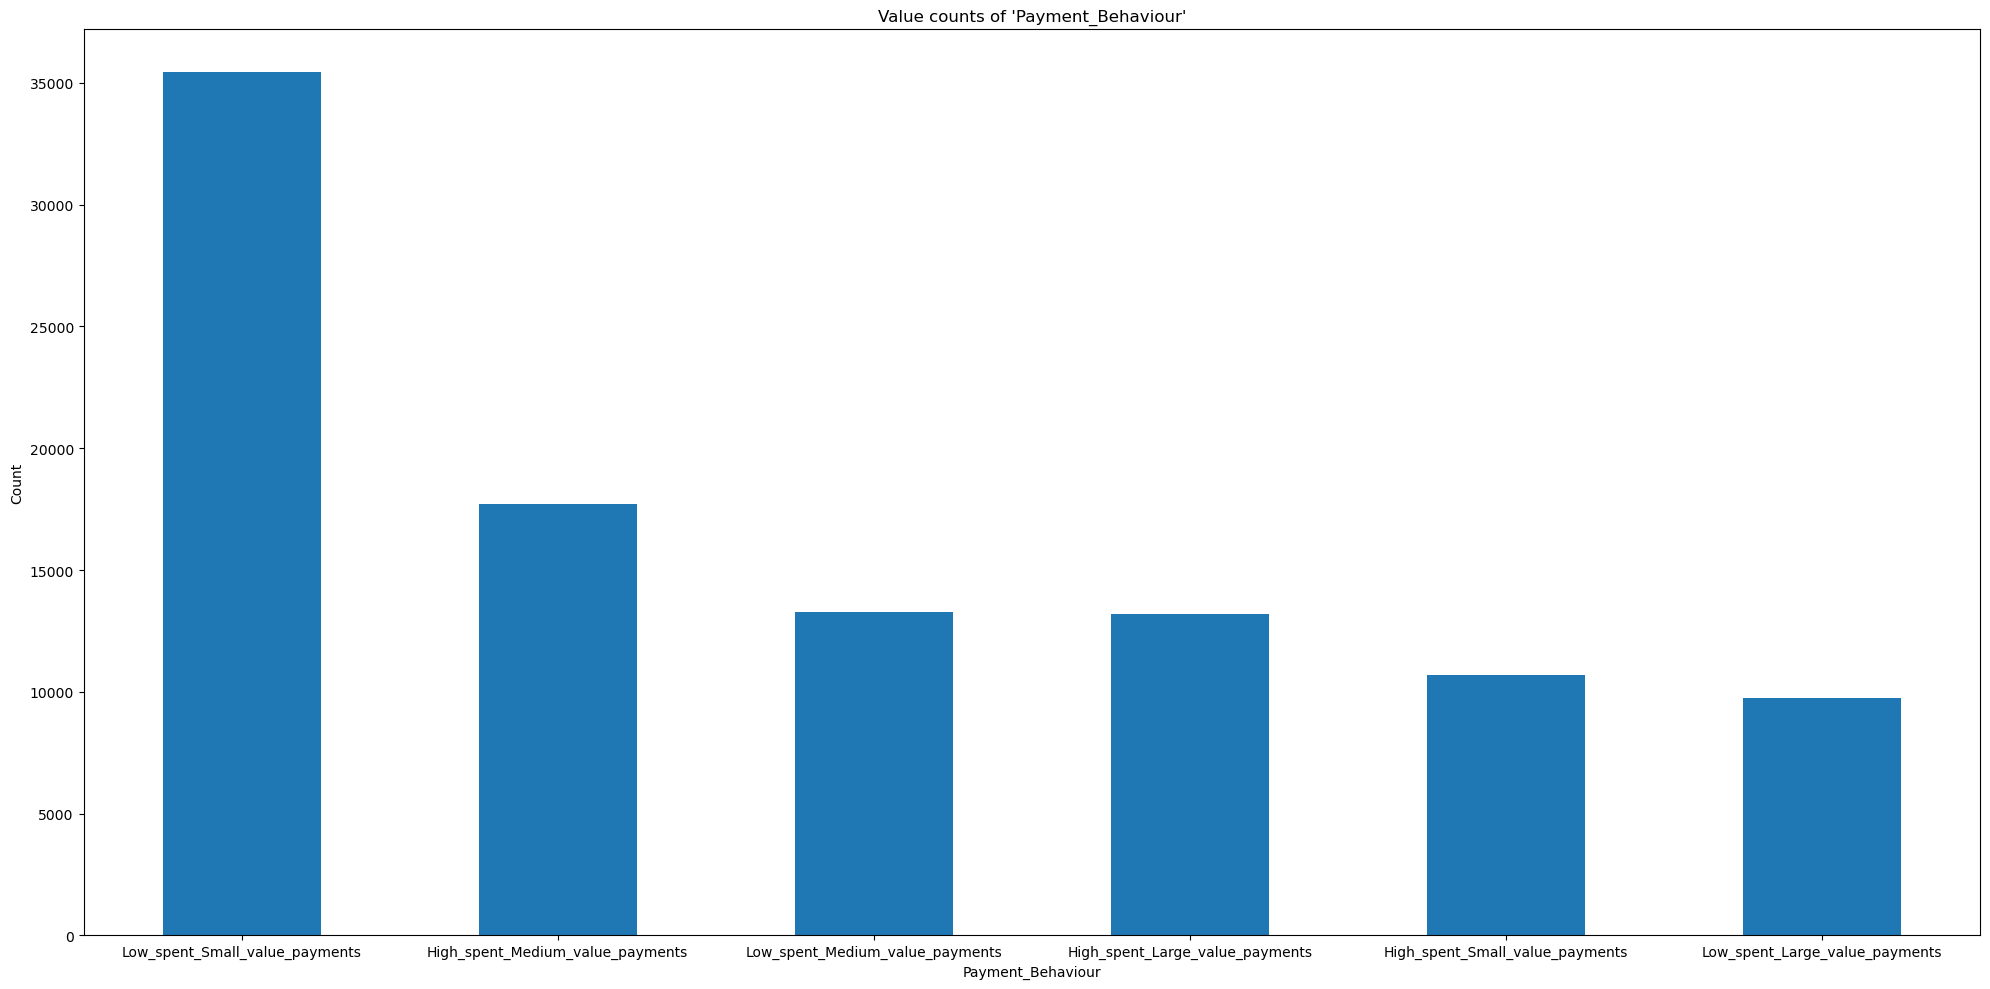

In [17]:
plt.figure(figsize=(20,10))
data_df['Payment_Behaviour'].value_counts().plot(kind="bar")
plt.title("Value counts of 'Payment_Behaviour'")
plt.xlabel("Payment_Behaviour")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

"Low_spent_Small_value_payments" are the most frequent.

#### Insights on "Credit_Score"
Since Credit_Score is the variable we aim to predict (hence it's our target variable), it is particularly interesting to see some insights.

In [18]:
data_df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

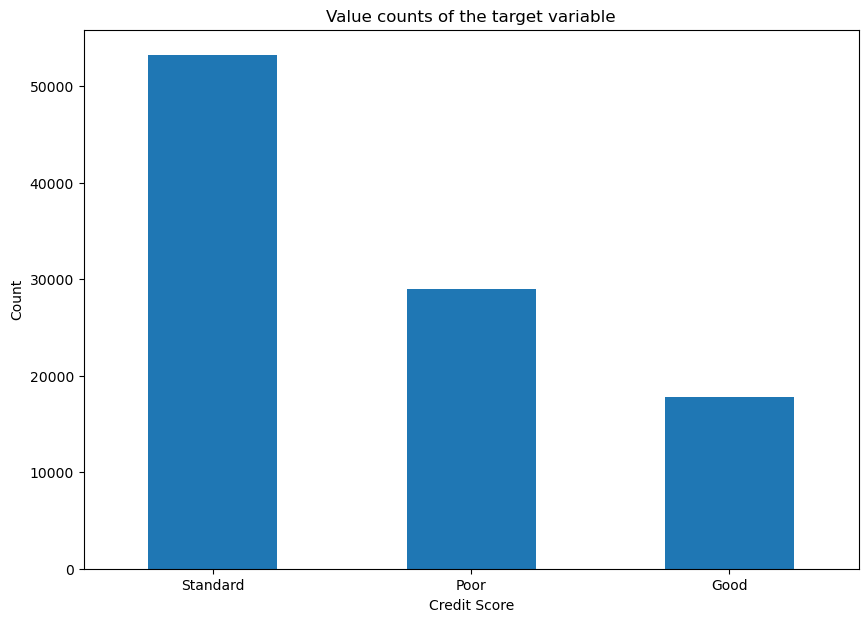

In [19]:
plt.figure(figsize=(10,7))
data_df['Credit_Score'].value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Credit Score")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

The plot shows us in a clear way that most of the users of our datasets are labelled as "Standard" credit score users.

Notice that what we have deduced from the plots might have been simply obtained using the ".mode()" function.

In [20]:
data_df['Occupation'].mode()

0    Lawyer
Name: Occupation, dtype: object

In [21]:
data_df['Credit_Mix'].mode()

0    Standard
Name: Credit_Mix, dtype: object

In [22]:
data_df['Payment_of_Min_Amount'].mode()

0    Yes
Name: Payment_of_Min_Amount, dtype: object

In [23]:
data_df['Payment_Behaviour'].mode()

0    Low_spent_Small_value_payments
Name: Payment_Behaviour, dtype: object

In [24]:
data_df['Credit_Score'].mode()

0    Standard
Name: Credit_Score, dtype: object

### 1.8 Insights on numerical variables

Since we're focusing on numerical variables, it is possible to compute correlation. In order to achieve such goal we will use the ".corr()" function. 

In [25]:
data_df.corr()

,id,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance
id,1.000000,0.003928,-0.006904,-0.003047,0.003438,-0.003064,0.004888,-0.007490,-0.005405,0.002836,0.008075,-0.002166,0.003925,-0.008959,-0.005988,0.000505,-0.003589
Age,0.003928,1.000000,0.076864,0.081069,-0.171239,-0.131825,-0.188201,-0.188940,-0.155521,-0.159038,-0.141264,-0.221927,-0.176598,0.013245,0.211021,0.002623,0.002658
Annual_Income,-0.006904,0.076864,1.000000,0.797872,-0.228116,-0.175864,-0.238290,-0.203708,-0.199158,-0.222368,-0.141100,-0.223483,-0.209089,0.115625,0.220930,0.025391,-0.003375
Monthly_Inhand_Salary,-0.003047,0.081069,0.797872,1.000000,-0.251379,-0.192278,-0.261682,-0.224970,-0.220592,-0.242914,-0.155790,-0.246659,-0.233517,0.125318,0.241836,0.028376,0.002562
Num_Bank_Accounts,0.003438,-0.171239,-0.228116,-0.251379,1.000000,0.396606,0.509492,0.416166,0.499245,0.520985,0.296989,0.457542,0.440399,-0.049145,-0.434820,-0.013199,0.000452
Num_Credit_Card,-0.003064,-0.131825,-0.175864,-0.192278,0.396606,1.000000,0.434278,0.368011,0.427296,0.366229,0.227202,0.407610,0.426837,-0.038176,-0.373831,-0.007585,-0.002531
Interest_Rate,0.004888,-0.188201,-0.238290,-0.261682,0.509492,0.434278,1.000000,0.481802,0.515039,0.479998,0.322939,0.546554,0.531683,-0.052040,-0.505162,-0.015713,0.000439
Num_of_Loan,-0.007490,-0.188940,-0.203708,-0.224970,0.416166,0.368011,0.481802,1.000000,0.440589,0.401980,0.329039,0.493544,0.547098,-0.070778,-0.536274,-0.009590,-0.004368
Delay_from_due_date,-0.005405,-0.155521,-0.199158,-0.220592,0.499245,0.427296,0.515039,0.440589,1.000000,0.462616,0.263995,0.477262,0.495868,-0.039908,-0.437551,-0.008768,-0.003315
Num_of_Delayed_Payment,0.002836,-0.159038,-0.222368,-0.242914,0.520985,0.366229,0.479998,0.401980,0.462616,1.000000,0.281492,0.427285,0.421136,-0.048411,-0.414391,-0.017011,0.000530


To have a better visualization, we create a heatmap.

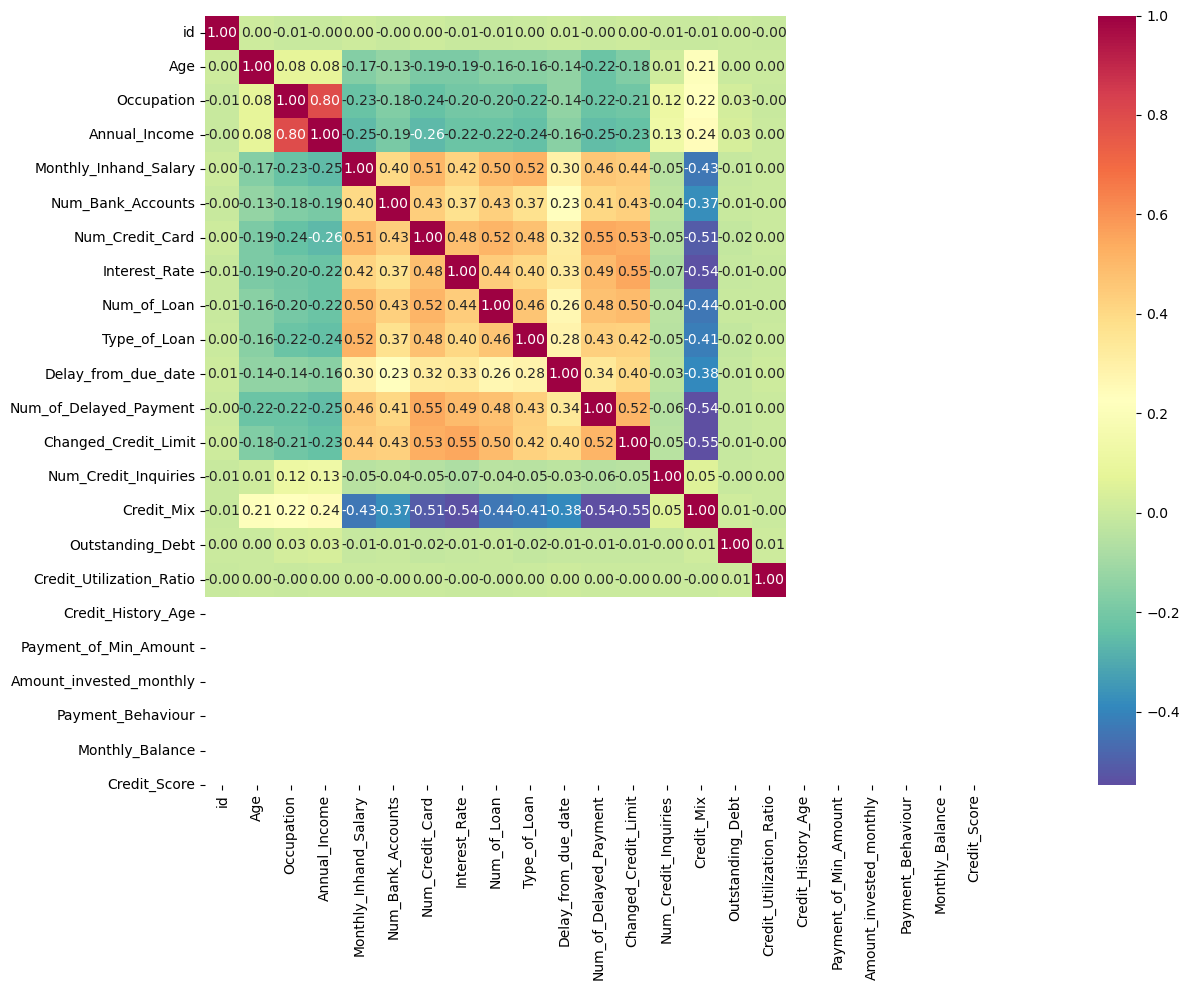

In [26]:
plt.figure(figsize=(25,10))
corrmat = data_df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=data_df.columns, 
                 xticklabels=data_df.columns, 
                 cmap="Spectral_r")
plt.tight_layout()
plt.show()

This heatmap may seem chaotic, but it is due to the shape of the matrix (hence, the number of numerical variables). 

We are interested in generating a plot for each numerical variable. Recall that the dataset consists of 17 numerical variables, but one of the latter is "id", which is not useful for any purpose. Hence, we get to 16 numerical variables of interest. The idea is to generate 16 subplots.

<Figure size 1800x720 with 0 Axes>

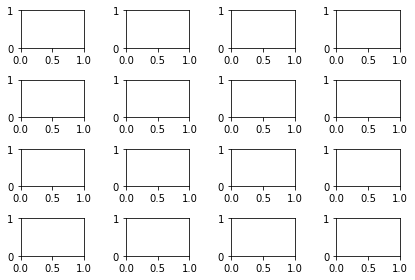

In [53]:
figure, axis = plt.subplots(4,4)
plt.tight_layout()

## 2) Generating training set and test set

Before splitting the dataset into training and test set, it is necessary to separate the independent variables from the dependent one (the one that we aim to predict).

In [57]:
X = data_df.iloc[:, 1:21].values #independent variables
y = data_df.iloc[:, 22].values #dependent variables


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Note that we are considering all the variables of the dataset as relevant. Moreover, we have generated a training set containing 75% of the observations, while a test set containing the remaining 25%.

## 3) Preprocessing data

Preprocessing phase is one of the most crucial ones when it comes to create machine learning models. It usually consists of the following stages:

1. Handling missing values
2. Inspecting for redundancy
3. Removing outliers
4. Encoding categorical data

In particular, we have already covered point 1. in the previous sections, when dealing with exploratory data analysis. In particular, we have replaced all the missing rows of each attribute with its mode. Furthermore we do not need to check for redundancy (which must be avoided) since we know that each row corresponds to a different user, identified by a unique ID. Hence, we will focus on the removal of outliers and on encoding the categorical variables we have in our dataset.